# Environment >>>

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data >>>

In [2]:
Final = pd.read_excel('Test_Set.xlsx')
customers = pd.read_excel('Customer_Demographics.xlsx')
transactions = pd.read_excel('Customer_Transaction.xlsx')
stores = pd.read_excel('Store_Master.xlsx')

# <(1)> Customers >>>

(100000, 16)
Customer_ID           int64
Territory            object
Nationality          object
Income_Range         object
Job_Type             object
Marital_Status       object
Gender               object
State                object
Language             object
Loyalty_Status       object
Birth_date           object
Age                 float64
Points              float64
First_txn_dt         object
Last_accr_txn_dt     object
Last_rdm_txn_dt      object
dtype: object
AxesSubplot(0.125,0.125;0.62x0.755)
Customer_ID             0
Territory               0
Nationality             0
Income_Range            0
Job_Type                0
Marital_Status          0
Gender                  0
State                   0
Language                0
Loyalty_Status          0
Birth_date          17538
Age                 26096
Points               2863
First_txn_dt           33
Last_accr_txn_dt        6
Last_rdm_txn_dt     28419
dtype: int64


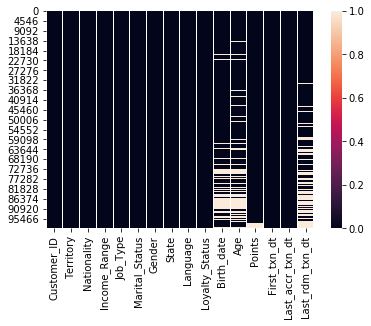

In [3]:
print(customers.shape)
print(customers.dtypes)
print(sns.heatmap(customers.isnull()))
print(customers.isnull().sum())

In [4]:
pp.ProfileReport(customers)

Number of variables,16
Number of observations,100000
Total Missing (%),4.7%
Total size in memory,12.2 MiB
Average record size in memory,128.0 B
Numeric,3
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [5]:
customers['Birth_date'] = pd.to_datetime(customers['Birth_date'], format ='%d%b%Y:%H:%M:%S')
customers['First_txn_dt'] = pd.to_datetime(customers['First_txn_dt'], format ='%d%b%Y:%H:%M:%S')
customers['Last_accr_txn_dt'] = pd.to_datetime(customers['Last_accr_txn_dt'], format ='%d%b%Y:%H:%M:%S')
customers['Last_rdm_txn_dt'] = pd.to_datetime(customers['Last_rdm_txn_dt'], format = '%d%b%Y:%H:%M:%S')

In [6]:
customers['Birth_year'] = customers['Birth_date'].dt.year
customers['Birth_week'] = customers['Birth_date'].dt.week
customers['First_txn_year'] = customers['First_txn_dt'].dt.year
customers['First_txn_week'] = customers['First_txn_dt'].dt.week
customers['Last_accr_txn_year'] = customers['Last_accr_txn_dt'].dt.year
customers['Last_accr_txn_week'] = customers['Last_accr_txn_dt'].dt.week
customers['Last_rdm_txn_year'] = customers['Last_rdm_txn_dt'].dt.year
customers['Last_rdm_txn_week'] = customers['Last_rdm_txn_dt'].dt.week

In [7]:
customers.isnull().sum()

Customer_ID               0
Territory                 0
Nationality               0
Income_Range              0
Job_Type                  0
Marital_Status            0
Gender                    0
State                     0
Language                  0
Loyalty_Status            0
Birth_date            17538
Age                   26096
Points                 2863
First_txn_dt             33
Last_accr_txn_dt          6
Last_rdm_txn_dt       28419
Birth_year            17538
Birth_week            17538
First_txn_year           33
First_txn_week           33
Last_accr_txn_year        6
Last_accr_txn_week        6
Last_rdm_txn_year     28419
Last_rdm_txn_week     28419
dtype: int64

[1959. 1900. 1962. 1976. 1969. 1980. 1977. 1973. 1971. 1982. 1990. 1975.
 1963. 1983. 1964. 1985. 1979. 1966. 1965. 1968. 1978. 1967. 1972. 1987.
 1988. 1986. 1974. 1950. 1957. 1970. 1881. 1981. 1989. 1991. 1953. 1999.
 1952. 1984. 1911. 1992. 1998. 1948. 1932. 1956. 1955. 1960. 1941. 1961.
 1954. 1958. 2000. 1995. 1924. 1942. 1993. 1997. 2007. 2003. 1994. 2009.
 1996. 2008. 1951. 1947. 1939. 1949. 2002. 2004. 2006. 1944. 2001. 1940.
 1919. 2010.   nan 2011. 1946. 2005. 1943. 2012. 1929. 2013. 1945. 1922.
 1935. 1917. 1933. 1928. 2014. 1905. 1909. 1902. 1937. 2015. 1912. 1927.
 1903. 1936. 1938. 1934. 2016. 1921. 1916. 2017. 1910.]


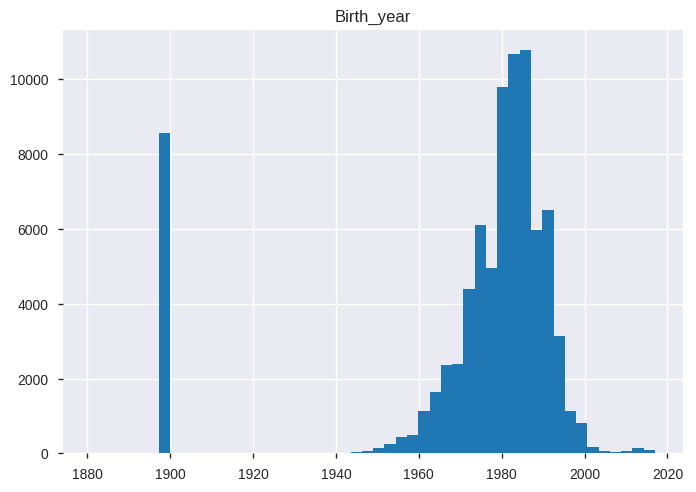

In [8]:
print(customers.Birth_year.unique())
customers.hist('Birth_year',bins=50)
customers.Birth_year = customers.Birth_year.mask(customers.Birth_year < 1938)
customers.Birth_year = customers.Birth_year.mask(customers.Birth_year > 2003)

In [9]:
customers['Birth_year'].fillna((customers.First_txn_year-30), inplace = True)
customers['Birth_week'] = customers['Birth_week'].apply(lambda x: np.random.choice(customers['Birth_week'].dropna().values) if pd.isnull(x) else x)

In [10]:
customers.First_txn_year.fillna(customers.Last_rdm_txn_year, inplace= True)
customers.First_txn_week.fillna(customers.Last_rdm_txn_week, inplace= True)
customers.First_txn_year.fillna(customers.Last_accr_txn_year, inplace= True)
customers.First_txn_week.fillna(customers.Last_accr_txn_week, inplace= True)

In [11]:
customers.First_txn_year.fillna((customers.Birth_year + 30), inplace=True)
customers['First_txn_week'] = customers['First_txn_week'].apply(lambda x: np.random.choice(customers['First_txn_week'].dropna().values) if pd.isnull(x) else x)

In [12]:
customers.Last_accr_txn_year.fillna(customers.Last_rdm_txn_year, inplace= True)
customers.Last_accr_txn_week.fillna(customers.Last_rdm_txn_week, inplace= True)
customers.Last_accr_txn_year.fillna(customers.First_txn_year, inplace= True)
customers.Last_accr_txn_week.fillna(customers.First_txn_week, inplace= True)

In [13]:
customers['Birth_year'].fillna((customers.First_txn_year-30), inplace = True) # again

In [14]:
customers.drop(['Last_rdm_txn_year','Last_rdm_txn_week'], inplace= True, 
               axis= 1)
customers.drop(['First_txn_dt','Birth_date',
                'Last_accr_txn_dt','Last_rdm_txn_dt'], axis = 1, inplace = True)
customers.drop(['Territory','Age'], axis=1, inplace=True)

In [15]:
customers['Points'].mask(customers.Points.between(-20000,0),inplace = True)
customers['Points'] = customers['Points'].apply(lambda x: np.random.choice(customers['Points'].dropna().values) if pd.isnull(x) else x)

In [16]:
customers.Birth_year[customers.First_txn_year.isnull() & customers.Last_accr_txn_year.isnull()]

96273   NaN
99339   NaN
Name: Birth_year, dtype: float64

In [17]:
customers.loc[[99339]] = customers.loc[[99339]].First_txn_year = 2016
customers.loc[[99339]] = customers.loc[[99339]].Last_acc_txn_year = 2018
customers.loc[[99339]] = customers.loc[[99339]].First_txn_week = 1
customers.loc[[99339]] = customers.loc[[99339]].Last_acc_txn_week = 1

In [18]:
customers.loc[[96273]] = customers.loc[[96273]].First_txn_year = 2017
customers.loc[[96273]] = customers.loc[[96273]].Last_acc_txn_year = 2017
customers.loc[[96273]] = customers.loc[[96273]].First_txn_week = 24
customers.loc[[96273]] = customers.loc[[96273]].Last_acc_txn_week = 49

In [19]:
customers['Customer_span'] = customers.Last_accr_txn_year - customers.First_txn_year

In [20]:
print(customers.dtypes)
print(customers.head())
customers.to_csv('customer_demographics.csv')

Customer_ID             int64
Nationality            object
Income_Range           object
Job_Type               object
Marital_Status         object
Gender                 object
State                  object
Language               object
Loyalty_Status         object
Points                float64
Birth_year            float64
Birth_week            float64
First_txn_year        float64
First_txn_week        float64
Last_accr_txn_year    float64
Last_accr_txn_week    float64
Customer_span         float64
dtype: object
        Customer_ID                     Nationality Income_Range  Job_Type  \
0  1800000006365760                           INDIA   Below 5000  Services   
1  1800000006365820            UNITED ARAB EMIRATES   Below 5000  Services   
2  1800000006366060                       SRI LANKA   Below 5000  Services   
3  1800000006366230                          JORDAN   Below 5000  Services   
4  1800000006366570  OCCUPIED PALESTINIAN TERRITORY   Below 5000  Services   

  Marit

# <(2)> Transactions >>>

In [21]:
pp.ProfileReport(transactions)

Number of variables,15
Number of observations,544649
Total Missing (%),7.2%
Total size in memory,62.3 MiB
Average record size in memory,120.0 B
Numeric,7
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,3


In [22]:
transactions.drop(['Business', 'Territory','City_Name','Store_Type'], axis= 1, inplace=True)
transactions = transactions.drop(transactions.index[0])

In [23]:
print(transactions.isnull().sum())
transactions.Return_Reason.fillna('Buy', inplace=True)

Year                     0
Week                     0
Store_Code               0
Transaction_Type         0
Return_Reason       507635
Customer_ID              0
Invoices                 0
Item_Count               0
Revenue                  0
Discount                 0
Units_Sold               0
dtype: int64


In [24]:
print(transactions.dtypes)
transactions.Year = transactions.Year.astype('object')

Year                  int64
Week                  int64
Store_Code            int64
Transaction_Type     object
Return_Reason        object
Customer_ID           int64
Invoices              int64
Item_Count            int64
Revenue             float64
Discount            float64
Units_Sold            int64
dtype: object


In [25]:
transactions.to_csv('transactions.csv')

# <(3)> Stores >>>

In [26]:
pp.ProfileReport(stores)

Number of variables,15
Number of observations,35
Total Missing (%),2.3%
Total size in memory,4.2 KiB
Average record size in memory,122.3 B
Numeric,6
Categorical,5
Boolean,0
Date,1
Text (Unique),1
Rejected,2


In [27]:
stores.isnull().sum()

Territory            0
Business             0
Region               0
Region_Code          0
Store_Code           0
Store_Name           0
Mall_Name            0
Store_Format         0
Sales_Per_Day        0
Store_Launch_Date    0
Train_Test_Store     0
Geo_Field            8
Store_Size_Sq_Ft     0
Customer_Count       4
Total_Revenue        0
dtype: int64

In [28]:
stores['Store_Launch_Date'] = pd.to_datetime(stores['Store_Launch_Date'], format='%Y-%m-%d')
stores['Store_Launch_Year'] = stores['Store_Launch_Date'].dt.year
stores['Store_Launch_Week'] = stores['Store_Launch_Date'].dt.week
stores.drop('Store_Launch_Date',axis=1,inplace=True)

In [29]:
print(stores.dtypes)
stores.Region_Code.astype('object')
stores.Store_Code.astype('object')

Territory             object
Business              object
Region                object
Region_Code            int64
Store_Code             int64
Store_Name            object
Mall_Name             object
Store_Format          object
Sales_Per_Day        float64
Train_Test_Store      object
Geo_Field             object
Store_Size_Sq_Ft     float64
Customer_Count       float64
Total_Revenue        float64
Store_Launch_Year      int64
Store_Launch_Week      int64
dtype: object


0     60077
1     60073
2     60065
3     60219
4     60071
5     60063
6     60075
7     60055
8     60066
9     60067
10    60241
11    60070
12    60062
13    60072
14    60058
15    60074
16    60064
17    60076
18    60069
19    60079
20    60059
21    60086
22    60060
23    60233
24    60068
25    60250
26    60057
27    60061
28    60053
29    60054
30    60275
31    60301
32    60298
33    60300
34    60299
Name: Store_Code, dtype: object

In [30]:
stores.drop(['Territory','Business','Region','Geo_Field','Store_Name','Mall_Name'], axis=1, inplace=True)
stores.drop(['Train_Test_Store'],axis=1,inplace=True)

In [31]:
stores.to_csv('stores.csv')